In [1]:
! bq query --use_legacy_sql=FALSE 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_r7228c9e4b07aaa8d_000001775b64f207_1 ... (0s) Current status: DONE   
+-----------------------------------------+--------------------------------------+-----------+
|           start_station_name            |           end_station_name           | trip_freq |
+-----------------------------------------+--------------------------------------+-----------+
| Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-----------------------------------------+--------------------------------------+-----------+


In [2]:
sql_cmd_01 = "SELECT COUNT(*) as Count, \
EXTRACT(HOUR FROM start_date) AS hour \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS bikeshare_trips \
--LEFT OUTER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS bikeshare_stations \
--ON bikeshare_trips.start_station_id = bikeshare_stations.station_id \
--WHERE EXTRACT(HOUR FROM start_date) > 4 AND EXTRACT(HOUR FROM start_date) < 10 \
WHERE start_station_id = 70 OR end_station_id = 70 \
GROUP BY hour --EXTRACT(HOUR FROM start_date) \
--GROUP BY station_id, start_station_id, name --subscriber_type  --, end_station_name \
ORDER BY hour ASC \
LIMIT 100;"

## Query in Notebook using magic command

**Query: popular hours of trips in a day

In [6]:
%%bigquery

#standardSQL
SELECT COUNT(*) as Count,
EXTRACT(HOUR FROM start_date) AS hour
FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS bikeshare_trips
--LEFT OUTER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS bikeshare_stations
--ON bikeshare_trips.start_station_id = bikeshare_stations.station_id
--WHERE EXTRACT(HOUR FROM start_date) > 4 AND EXTRACT(HOUR FROM start_date) < 10
WHERE start_station_id = 70 OR end_station_id = 70
GROUP BY hour --EXTRACT(HOUR FROM start_date)
--GROUP BY station_id, start_station_id, name --subscriber_type  --, end_station_name
ORDER BY hour ASC
LIMIT 100;

,Count,hour
0,289,0
1,105,1
2,54,2
3,25,3
4,83,4
5,473,5
6,5779,6
7,20205,7
8,26843,8
9,12989,9


**Query: popular station names

In [7]:
%%bigquery

SELECT start_station_name, end_station_name, COUNT(*) AS Count
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    GROUP BY start_station_name, end_station_name
    ORDER BY Count DESC
    LIMIT 10;

,start_station_name,end_station_name,Count
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6836
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6351
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),6215
8,Steuart at Market,2nd at Townsend,6039
9,Steuart at Market,San Francisco Caltrain (Townsend at 4th),5959


**Query: Average Bikes available by station id anf time

In [8]:
%%bigquery
SELECT station_id, (docks_available + bikes_available) AS total_bikes, time
    FROM `bigquery-public-data.san_francisco.bikeshare_status`
    WHERE station_id IN (90, 91, 92)
    ORDER BY total_bikes desc
    LIMIT 10

,station_id,total_bikes,time
0,91,35,2016-08-28 12:05:47+00:00
1,91,35,2016-08-28 00:37:01+00:00
2,91,35,2016-08-28 06:00:48+00:00
3,91,35,2016-08-29 14:56:00+00:00
4,91,35,2016-08-27 04:11:49+00:00
5,91,35,2016-08-25 10:35:46+00:00
6,91,35,2016-08-26 01:58:59+00:00
7,91,35,2016-08-25 01:10:57+00:00
8,91,35,2016-08-26 00:47:00+00:00
9,91,35,2016-08-30 11:04:01+00:00


## Output Query to csv file

In [28]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT COUNT(trip_id) as trip_Count,EXTRACT (MONTH FROM start_date) AS month, FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS bikeshare_trips GROUP BY month --, year ORDER BY Count DESC ' > result_month.csv

Waiting on bqjob_r305ccc44184429ca_0000017763f65f6a_1 ... (0s) Current status: DONE   


## Read in Pandas

**Plot: Plotting the trip_count vs month.** <br /> **Observation: winter months have lower trip counts.

In [29]:
import pandas as pd

In [30]:
trips_per_month = pd.read_csv('result_month.csv')
trips_per_month

,trip_Count,month
0,87321,9
1,94378,10
2,81777,3
3,57961,12
4,69985,2
5,73091,11
6,86364,5
7,71788,1
8,84196,4
9,91672,6


<AxesSubplot:xlabel='month'>

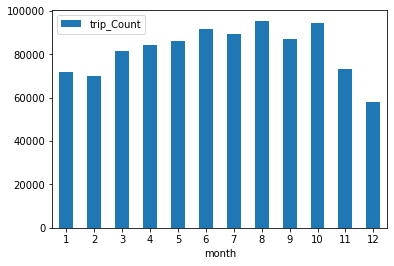

In [35]:
trips_per_month.plot.bar(x='month', y='trip_Count', rot=0)

## * What are the 5 most popular trips that you would call "commuter trips"? 

**Answer: I consider the trips that has maximum counts of start_station_id to be the most popular and hence call them as "commuter trips". Seems like most people with high count of start_station_id (for example 70,69,50 and so on from the table/plot below) might commute to work from these bike stations which could possibly be a reason for the high count t those station_id's. Hence, I would call these popular trips as "commuter trips". Here, I have also plotted the station id locations using latitude and longitude using the neighborhood map. Also, provided a plot of station_id versus trip counts the popular station id's  

*there can be other definitions of commuter trips by querying duration times or trip_id counts and so on.


In [36]:
%%bigquery 

SELECT station_id, start_station_id, name, COUNT(*) AS Count, --subscriber_type,  --end_station_name
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS bikeshare_trips
    LEFT OUTER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS bikeshare_stations
    ON bikeshare_trips.start_station_id = bikeshare_stations.station_id
    WHERE start_station_id = station_id
    GROUP BY station_id, start_station_id, name --subscriber_type  --, end_station_name
    ORDER BY Count DESC
    LIMIT 100;

,station_id,start_station_id,name,Count
0,70,70,San Francisco Caltrain (Townsend at 4th),72683
1,69,69,San Francisco Caltrain 2 (330 Townsend),56100
2,50,50,Harry Bridges Plaza (Ferry Building),49062
3,60,60,Embarcadero at Sansome,41137
4,61,61,2nd at Townsend,39936
...,...,...,...,...
69,21,21,Franklin at Maple,241
70,90,90,5th St at Folsom St,173
71,89,89,S. Market st at Park Ave,84
72,91,91,Cyril Magnin St at Ellis St,69


In [63]:
%%bigquery df_popular_trips

SELECT station_id, start_station_id, name, latitude, longitude, COUNT(*) AS sta_Count, --subscriber_type,  --end_station_name
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS bikeshare_trips
    LEFT OUTER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS bikeshare_stations
    ON bikeshare_trips.start_station_id = bikeshare_stations.station_id
    WHERE start_station_id = station_id
    GROUP BY station_id, start_station_id, name, latitude, longitude --, subscriber_type , end_station_name
    ORDER BY sta_Count DESC
    LIMIT 100;

In [95]:
df_popular_trips2 = df_popular_trips.loc[df_popular_trips['latitude'] > 37.7]
df_popular_trips2.head(40)

,station_id,start_station_id,name,latitude,longitude,sta_Count,geometry
0,70,70,San Francisco Caltrain (Townsend at 4th),37.776617,-122.395260,72683,POINT (-122.39526 37.77662)
1,69,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,56100,POINT (-122.39547 37.77660)
2,50,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,49062,POINT (-122.39420 37.79539)
3,60,60,Embarcadero at Sansome,37.804770,-122.403234,41137,POINT (-122.40323 37.80477)
4,61,61,2nd at Townsend,37.780526,-122.390288,39936,POINT (-122.39029 37.78053)
5,55,55,Temporary Transbay Terminal (Howard at Beale),37.789756,-122.394643,39200,POINT (-122.39464 37.78976)
6,74,74,Steuart at Market,37.794139,-122.394434,38531,POINT (-122.39443 37.79414)
7,77,77,Market at Sansome,37.789625,-122.400811,35142,POINT (-122.40081 37.78963)
8,65,65,Townsend at 7th,37.771058,-122.402717,34894,POINT (-122.40272 37.77106)
9,67,67,Market at 10th,37.776619,-122.417385,30209,POINT (-122.41738 37.77662)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


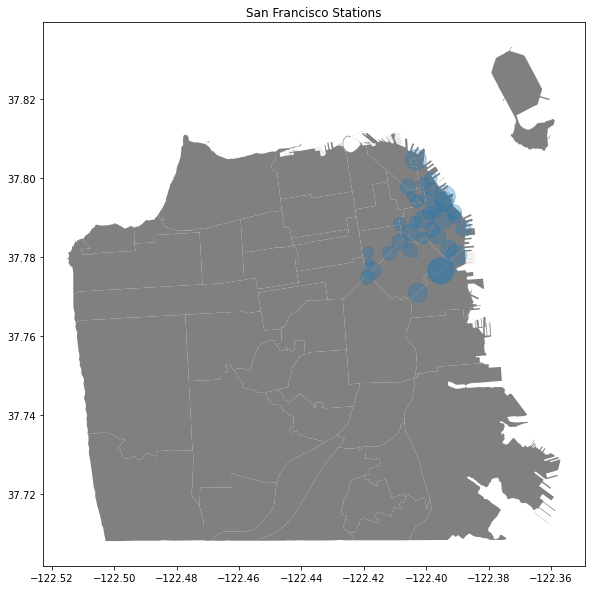

In [80]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

df_popular_trips.head()
# fig,axg = plt.subplots(figsize=(15,15))
# street_map.plot()

# Read the neighborhoods
sf = gpd.read_file("Analysis Neighborhoods.geojson")
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')

# Set up the data for plotting
df_popular_trips2['geometry'] = df_popular_trips2.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
crs = {'init': 'epsg:4326'}
data = gpd.GeoDataFrame(df_popular_trips2, crs=crs, geometry = 'geometry')

# Plot the 2 things together
fig, ax = plt.subplots(1, figsize=(13,10))
sf_map = sf.plot(ax=ax, color='gray')
data.plot(ax=sf_map, marker="o", markersize=data['sta_Count']/100, alpha=0.3, label = "name")
ax.set_title("San Francisco Stations")
plt.show()
# df_popular_trips.plot.bar(x='station_id', y='sta_Count', rot=45 )

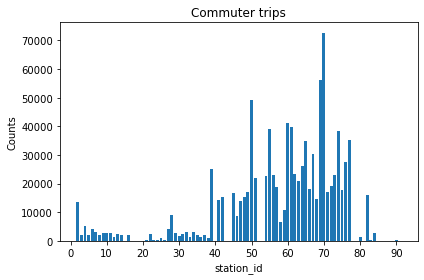

In [65]:
#df_popular_trips.plot.bar(x='station_id', y='sta_Count', rot=45 )
fig,axs = plt.subplots(1,1)
axs.bar(df_popular_trips.station_id,df_popular_trips.sta_Count)

locator=MaxNLocator(prune='both',nbins=10)
axs.xaxis.set_major_locator(locator)
axs.set_xlabel('station_id')
axs.set_ylabel('Counts')
axs.set_title('Commuter trips')
plt.tight_layout()

fig.show()


**Query: How duration varies with station_id and trip_count** <br /> __Observation: Typically popular station_id's with higher trip counts are smaller duration trips while the lower trip counts station_id's are higher duration trips.

In [88]:
%%bigquery df_trip_duration

SELECT start_station_id, count(*) AS trip_count, AVG(duration_sec) AS duration_sec_mean
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY start_station_id
ORDER BY duration_sec_mean DESC 
LIMIT 1000;

In [89]:
df_trip_duration.head()

,start_station_id,trip_count,duration_sec_mean
0,35,2002,6455.075924
1,36,1418,4079.569817
2,24,272,3846.242647
3,38,1026,3784.557505
4,3,2137,3726.586804


<AxesSubplot:xlabel='duration_sec_mean'>

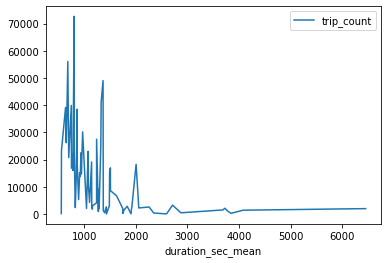

In [91]:
df_trip_duration.plot(x='duration_sec_mean', y='trip_count')

## What are your recommendations for offers (justify based on your findings)?

**A summary of my findings and recommendations from this project work are:**

  1. Some popular stations have higher availability of bikes and many of the bikers who ride to these popular stations are customers as opposed to subscribers. I would recommend that Lyft Bay Wheels offer some sort of deals like corporate membership or a free 30 min bike ride to whoever uses stations where bike availability if high (example station_id 62).
  
  2. The winter months have less bike rides. So Lyft Bay Wheels can offer special seasonal discounts in those months. 
  
  3. The regions with long duration trips probably need more bike stations to make the durations shorter. This would increase the accessibility in those regions and drive up revenue.
  